<a href="https://colab.research.google.com/github/kridtapon/Porfolio-Compare-S-P-500/blob/main/Porfolio_Compare_S%26P_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  26 of 26 completed


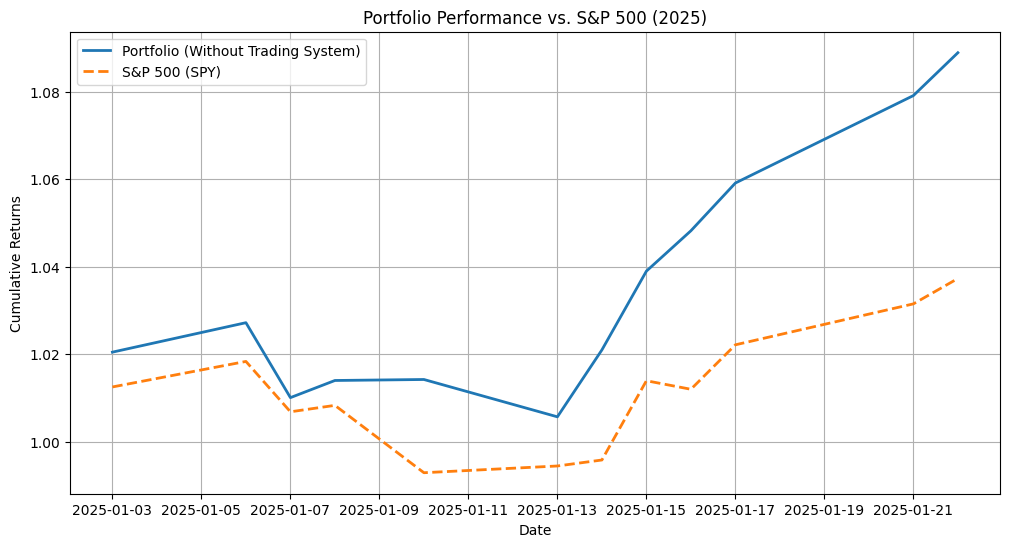

                  Metric  Portfolio  S&P 500 (SPY)
0      Cumulative Return   0.088886       0.037288
1      Annualized Return   0.088886       0.037288
2  Annualized Volatility   0.172644       0.150262
3           Sharpe Ratio   0.514852       0.248153


<ipython-input-3-fc1d99141c05>:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = returns[-1] - 1
<ipython-input-3-fc1d99141c05>:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annualized_return = (returns[-1])**(1/1) - 1  # 1 year


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define stock tickers
stock_tickers = [
    "ANET", "APO", "AVGO", "AXON", "CEG", "DECK", "FICO", "FOX", "FOXA", "GDDY",
    "HWM", "KKR", "META", "NFLX", "NRG", "NVDA", "PLTR", "RCL", "SYF", "TPL",
    "TPR", "TRGP", "UAL", "VST", "WMT"
]

# Add S&P 500 ETF (SPY) for comparison
benchmark_ticker = "SPY"

# Set the time frame for 2025
start_date = "2025-01-01"
end_date = "2025-12-31"

# Fetch stock data from Yahoo Finance
def fetch_data(tickers, start, end):
    data = yf.download(tickers, start=start, end=end)["Close"]
    return data

# Get data for stocks and benchmark
data = fetch_data(stock_tickers + [benchmark_ticker], start_date, end_date)

# Drop rows with missing data
data = data.dropna()

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Initialize portfolio weights (equal allocation)
num_stocks = len(stock_tickers)
weights = np.array([1/num_stocks] * num_stocks)

# Calculate portfolio daily returns
portfolio_returns = (daily_returns[stock_tickers] @ weights)

# Add portfolio returns to the dataset
data["Portfolio"] = (1 + portfolio_returns).cumprod()

# Add S&P 500 cumulative returns to the dataset
data["SPY"] = (1 + daily_returns[benchmark_ticker]).cumprod()

# Plot the portfolio vs. S&P 500
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Portfolio"], label="Portfolio (Without Trading System)", linewidth=2)
plt.plot(data.index, data["SPY"], label="S&P 500 (SPY)", linewidth=2, linestyle="--")
plt.title("Portfolio Performance vs. S&P 500 (2025)")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid()
plt.show()

# Calculate key performance metrics
def calculate_metrics(returns):
    cumulative_return = returns[-1] - 1
    annualized_return = (returns[-1])**(1/1) - 1  # 1 year
    annualized_volatility = returns.pct_change().std() * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_volatility
    return cumulative_return, annualized_return, annualized_volatility, sharpe_ratio

portfolio_metrics = calculate_metrics(data["Portfolio"])
spy_metrics = calculate_metrics(data["SPY"])

# Display metrics
metrics_df = pd.DataFrame({
    "Metric": ["Cumulative Return", "Annualized Return", "Annualized Volatility", "Sharpe Ratio"],
    "Portfolio": portfolio_metrics,
    "S&P 500 (SPY)": spy_metrics
})
print(metrics_df)
